<a href="https://colab.research.google.com/github/Chamal-Dakshana/TMP-2023-24-90/blob/IT20089054/lung_cancer_prediction_using_densenet121_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing import image  # Add this import statement
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
! pip install -q kaggle
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets download 'waseemnagahhenes/lung-cancer-dataset-iq-othnccd'

mkdir: cannot create directory ‘/root/.kaggle’: File exists
 97% 254M/261M [00:02<00:00, 108MB/s]
100% 261M/261M [00:02<00:00, 120MB/s]


In [ ]:
! unzip 'lung-cancer-dataset-iq-othnccd'

Archive:  lung-cancer-dataset-iq-othnccd.zip
  inflating: Data/The IQ-OTHNCCD lung cancer dataset/Bengin cases/Bengin case (1).jpg  
  inflating: Data/The IQ-OTHNCCD lung cancer dataset/Bengin cases/Bengin case (10).jpg  
  inflating: Data/The IQ-OTHNCCD lung cancer dataset/Bengin cases/Bengin case (100).jpg  
  inflating: Data/The IQ-OTHNCCD lung cancer dataset/Bengin cases/Bengin case (101).jpg  
  inflating: Data/The IQ-OTHNCCD lung cancer dataset/Bengin cases/Bengin case (102).jpg  
  inflating: Data/The IQ-OTHNCCD lung cancer dataset/Bengin cases/Bengin case (103).jpg  
  inflating: Data/The IQ-OTHNCCD lung cancer dataset/Bengin cases/Bengin case (104).jpg  
  inflating: Data/The IQ-OTHNCCD lung cancer dataset/Bengin cases/Bengin case (105).jpg  
  inflating: Data/The IQ-OTHNCCD lung cancer dataset/Bengin cases/Bengin case (106).jpg  
  inflating: Data/The IQ-OTHNCCD lung cancer dataset/Bengin cases/Bengin case (107).jpg  
  inflating: Data/The IQ-OTHNCCD lung cancer dataset/Bengi

In [ ]:
#path
data_dir = 'Data/The IQ-OTHNCCD lung cancer dataset'

In [ ]:
image_size = (256, 256) #resize all images
batch_size = 32

In [ ]:
# Create an ImageDataGenerator for data augmentation (optional)
datagen = ImageDataGenerator(
    rescale=1.0 / 255,        #Normalize pixel values to [0, 1]
    rotation_range=20,        #rotate right or left 20 degrees
    width_shift_range=0.2,    #horizontal position 20% increse whole image right or left
    height_shift_range=0.2,   #vertical position 20% increse whole image up or download
    horizontal_flip=True,     #horizontal flipping left to right
    validation_split=0.2      #val 20%, test 80%
)

In [ ]:
# Load the dataset from the directory and split it into training and validation sets
train_data = datagen.flow_from_directory(
    data_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',  # For multiclass classification
    subset='training'  # Use the training split
)

val_data = datagen.flow_from_directory(
    data_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',  # For multiclass classification
    subset='validation'  # Use the validation split
)

Found 1660 images belonging to 3 classes.
Found 413 images belonging to 3 classes.


In [ ]:
# Load the pre-trained DenseNet121 model with weights from ImageNet
base_model = DenseNet121(include_top=False, weights='imagenet', input_shape=(256, 256, 3))


29084464/29084464 [==============================] - 0s 0us/step


In [ ]:
# Add custom classification head
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)
predictions = Dense(3, activation='softmax')(x)  # 3 output classes (Bengin, malignant, normal)


In [ ]:
# Create the model
model = Model(inputs=base_model.input, outputs=predictions)


In [ ]:
# Compile the model
model.compile(
    optimizer=Adam(lr=0.0001),
    loss='categorical_crossentropy',  # Use categorical cross-entropy for multiclass classification
    metrics=['accuracy']
)


In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 256, 256, 3)]        0         []                            
                                                                                                  
 zero_padding2d (ZeroPaddin  (None, 262, 262, 3)          0         ['input_1[0][0]']             
 g2D)                                                                                             
                                                                                                  
 conv1/conv (Conv2D)         (None, 128, 128, 64)         9408      ['zero_padding2d[0][0]']      
                                                                                                  
 conv1/bn (BatchNormalizati  (None, 128, 128, 64)         256       ['conv1/conv[0][0]']      

In [ ]:
# Train the model
epochs = 20
history = model.fit(
    train_data,
    epochs=epochs,
    validation_data=val_data
)

Epoch 1/20
52/52 [==============================] - 126s 1s/step - loss: 0.3995 - accuracy: 0.8524 - val_loss: 3.0320 - val_accuracy: 0.2954
Epoch 2/20
52/52 [==============================] - 51s 982ms/step - loss: 0.2633 - accuracy: 0.8994 - val_loss: 2.8146 - val_accuracy: 0.4092
Epoch 3/20
52/52 [==============================] - 48s 915ms/step - loss: 0.2791 - accuracy: 0.8964 - val_loss: 3.7968 - val_accuracy: 0.3511
Epoch 4/20
52/52 [==============================] - 49s 943ms/step - loss: 0.2345 - accuracy: 0.9084 - val_loss: 3.2878 - val_accuracy: 0.5835
Epoch 5/20
52/52 [==============================] - 48s 923ms/step - loss: 0.2231 - accuracy: 0.9187 - val_loss: 0.8633 - val_accuracy: 0.6610
Epoch 6/20
52/52 [==============================] - 48s 917ms/step - loss: 0.1798 - accuracy: 0.9199 - val_loss: 3.7049 - val_accuracy: 0.3148
Epoch 7/20
52/52 [==============================] - 47s 903ms/step - loss: 0.2065 - accuracy: 0.9193 - val_loss: 0.9104 - val_accuracy: 0.7361
E

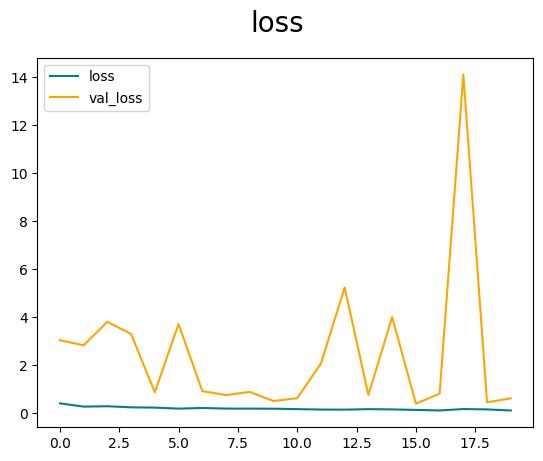

In [ ]:
fig = plt.figure()
plt.plot(history.history['loss'], color='teal', label='loss')
plt.plot(history.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

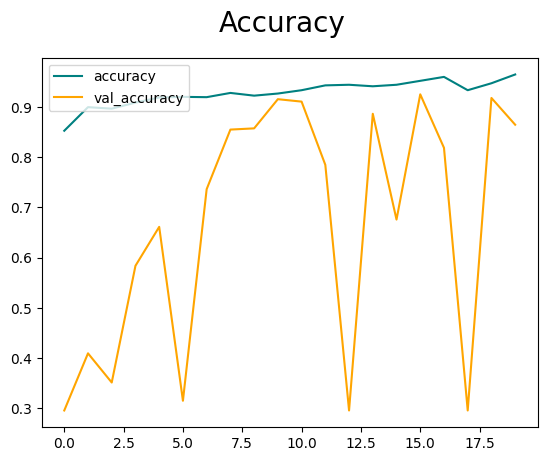

In [ ]:
fig = plt.figure()
plt.plot(history.history['accuracy'], color='teal', label='accuracy')
plt.plot(history.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [ ]:
# Print the training and validation metrics
print("Training history:")
print(history.history)

Training history:
{'loss': [0.39319369196891785, 0.2547726631164551, 0.21711477637290955, 0.22655881941318512, 0.21564871072769165, 0.1781366765499115, 0.16530631482601166, 0.16502906382083893, 0.14170363545417786, 0.20749467611312866, 0.1544707864522934, 0.1329636573791504, 0.13318784534931183, 0.11416799575090408, 0.128389373421669, 0.13974986970424652, 0.1476549655199051, 0.12694051861763, 0.12316516786813736, 0.13060390949249268], 'accuracy': [0.8632529973983765, 0.9108433723449707, 0.9102409482002258, 0.9138554334640503, 0.9102409482002258, 0.925301194190979, 0.9265060424804688, 0.9277108311653137, 0.9391566514968872, 0.9156626462936401, 0.9343373775482178, 0.9463855624198914, 0.9487951993942261, 0.9542168378829956, 0.9475903511047363, 0.9506024122238159, 0.9433735013008118, 0.9518072009086609, 0.9548192620277405, 0.949999988079071], 'val_loss': [3.49063777923584, 2.134624719619751, 1.1085255146026611, 7.330573558807373, 0.4185165464878082, 0.6279463768005371, 1.8885793685913086, 

In [ ]:
# Display sample images from the validation set
sample_batch = next(val_data)  # Get a batch of validation data
sample_images, sample_labels = sample_batch
sample_predictions = model.predict(sample_images)


1/1 [==============================] - 3s 3s/step


In [ ]:
# Define class labels
class_labels = ['Benign', 'Malignant', 'Normal']

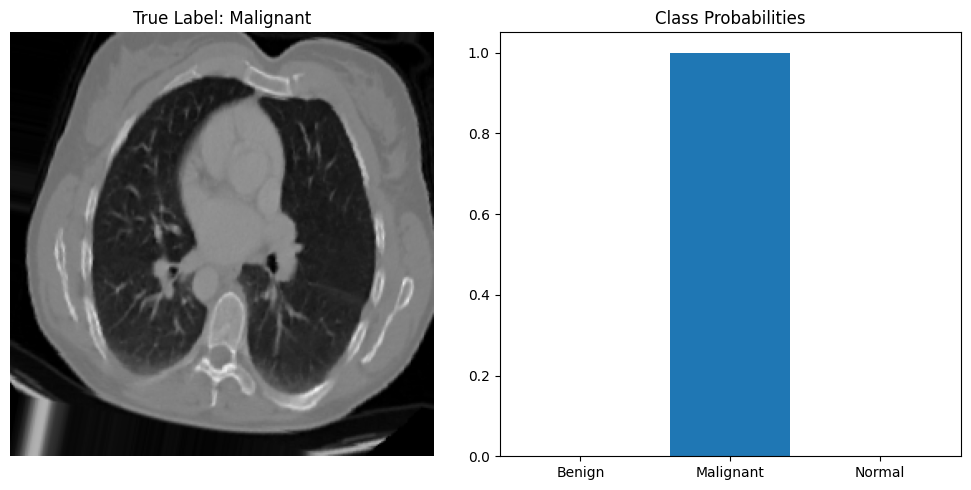

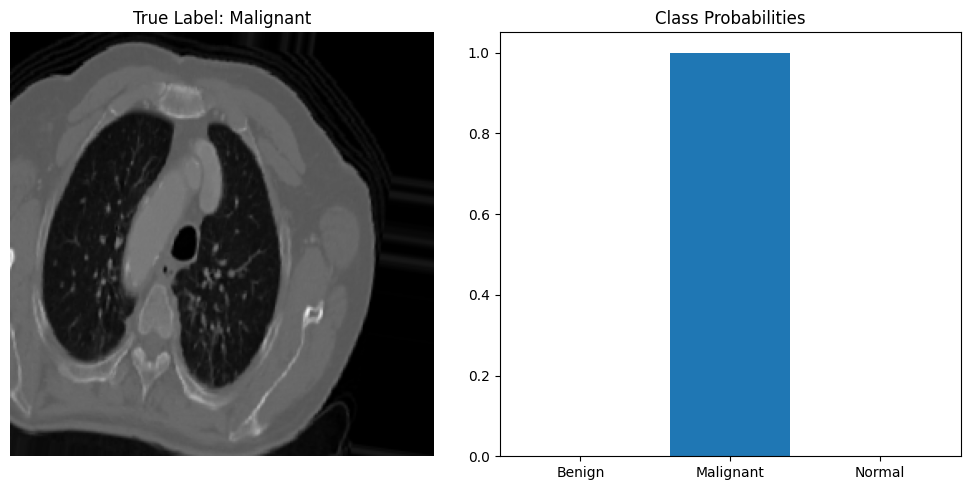

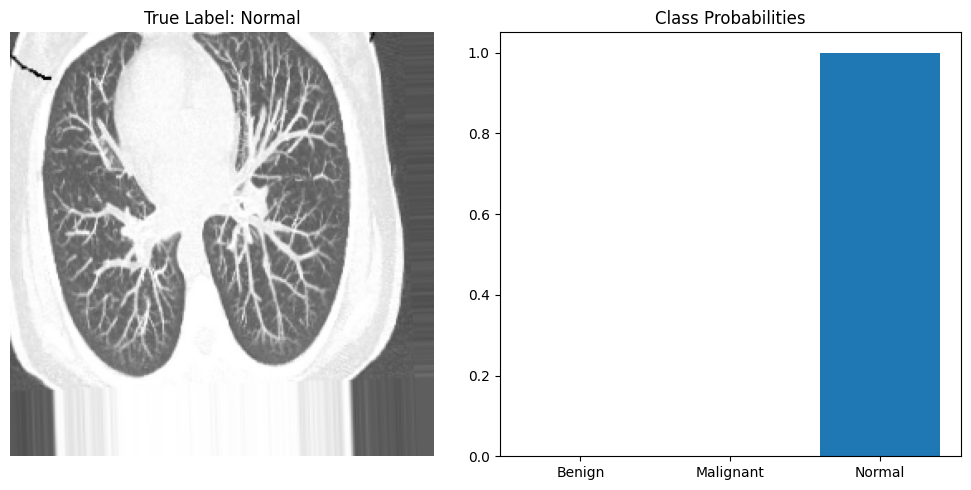

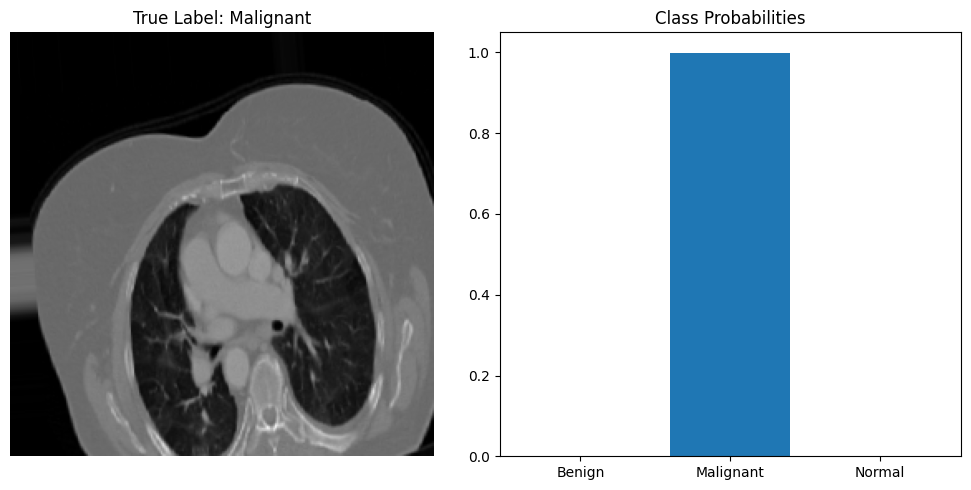

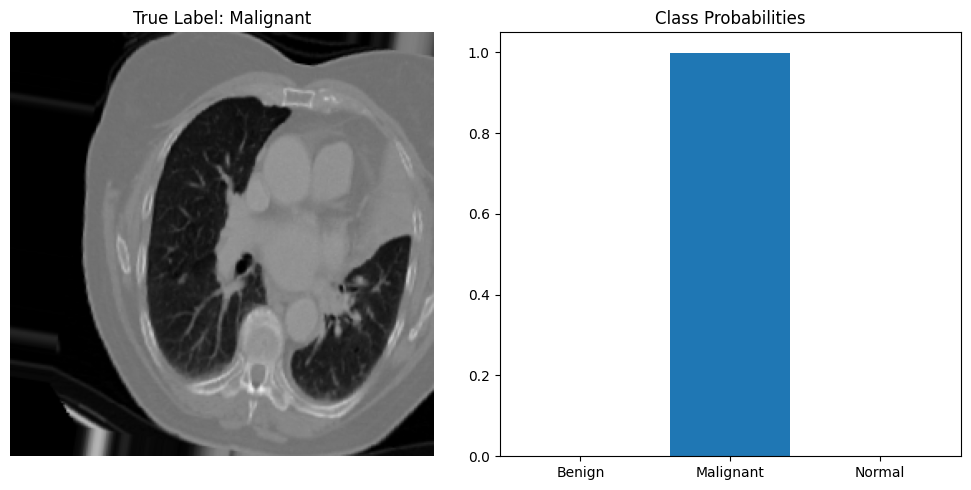

In [ ]:
# Display the first few sample images and their predictions
num_samples = min(5, batch_size)
for i in range(num_samples):
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(sample_images[i])
    plt.title(f"True Label: {class_labels[sample_labels[i].argmax()]}")
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.bar(class_labels, sample_predictions[i])
    plt.title("Class Probabilities")
    plt.tight_layout()
    plt.show()

1/1 [==============================] - 0s 36ms/step


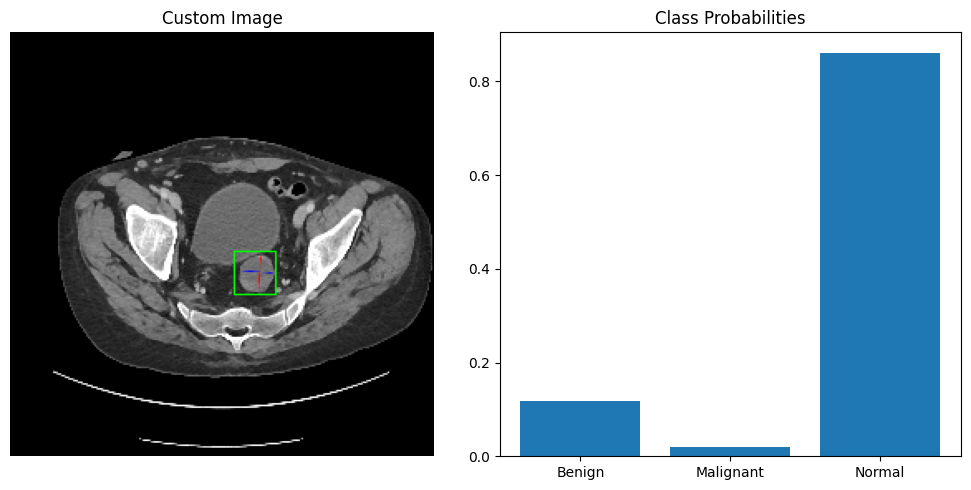

In [ ]:
# Load your custom image for display
custom_image_path = "/content/Data/The IQ-OTHNCCD lung cancer dataset/Normal cases/004007_01_01_519.png"
custom_image = image.load_img(custom_image_path, target_size=image_size)
custom_image = image.img_to_array(custom_image)
custom_image = custom_image / 255.0  # Normalize the pixel values to [0, 1]
custom_image = np.expand_dims(custom_image, axis=0)  # Add a batch dimension

# Make predictions on the custom image
custom_predictions = model.predict(custom_image)

# Display the custom image and its predictions
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(custom_image[0])
plt.title("Custom Image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.bar(class_labels, custom_predictions[0])
plt.title("Class Probabilities")
plt.tight_layout()
plt.show()
